# Data exploration

## Import dataset

In [42]:
import pandas as pd
import os

df = pd.DataFrame()
directory_path = "data/"
for file_name in os.listdir(directory_path):
    try:
        file_path = os.path.join(directory_path, file_name)
        # Read the CSV file into a temporary DataFrame
        temp_df = pd.read_excel(file_path, )
        
        # Append the contents to the main DataFrame
        df = pd.concat([df, temp_df], ignore_index=True)
    except:
        print(f"Cannot append {file_name} in the dataframe")

df

,note,auteur,avis,assureur,produit,type,date_publication,date_exp,avis_en,avis_cor,avis_cor_en
0,3.0,acacia-69753,"Bonjour, j'ai été démarché au téléphone, la pe...",Néoliane Santé,sante,train,29/12/2018,01/12/2018,"Hello, I was approached on the phone, the pers...",NaN,NaN
1,4.0,gelas-m-119083,Je suis satisfait du service et des tarifs pro...,L'olivier Assurance,auto,train,24/06/2021,01/06/2021,I am satisfied with the service and the prices...,NaN,NaN
2,1.0,mathilde-112565,on m a oblige a adherer a un pack en me disant...,Harmonie Mutuelle,sante,train,04/05/2021,01/05/2021,I was forced to adhere to a pack telling me th...,NaN,NaN
3,2.0,mau56-81436,Sociétaire MACIF depuis 1972 bonus à 50 et 4 c...,MACIF,auto,train,02/12/2019,01/12/2019,Macif member since 1972 bonuses at 50 and 4 co...,NaN,NaN
4,5.0,ely-103247,Je suis à la MAIF depuis plus 40 ans et en sui...,MAIF,auto,train,26/01/2021,01/01/2021,I have been in Maif for over 40 years and am v...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
34430,5.0,panazolais--102537,"Facilité pour contracter via internet, prix tr...",AMV,moto,train,12/01/2021,01/01/2021,"Easy to contract via the Internet, very compet...",NaN,NaN
34431,4.0,marc-r-123755,Je suis satisfait du service: j'ai eu à contac...,GMF,auto,train,18/07/2021,01/07/2021,I am satisfied with the service: I had to cont...,NaN,NaN
34432,1.0,mat-94796,Bonjour \nJe suis en arrêt depuis plus de troi...,Allianz,prevoyance,train,21/07/2020,01/07/2020,Hello\nI have stopped for more than three mont...,NaN,NaN
34433,1.0,abdel-111209,Suite à un dégât des eaux j’attends depuis plu...,Matmut,habitation,train,22/04/2021,01/04/2021,Following a water damage I have been waiting f...,NaN,NaN


In [44]:
# Convert a column to datetime
df['date_publication'] = pd.to_datetime(df['date_publication'], dayfirst=True)
df['date_exp'] = pd.to_datetime(df['date_exp'], dayfirst=True)

In [45]:
df.shape

(34435, 11)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34435 entries, 0 to 34434
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   note              24104 non-null  float64       
 1   auteur            34434 non-null  object        
 2   avis              34435 non-null  object        
 3   assureur          34435 non-null  object        
 4   produit           34435 non-null  object        
 5   type              34435 non-null  object        
 6   date_publication  34435 non-null  datetime64[ns]
 7   date_exp          34435 non-null  datetime64[ns]
 8   avis_en           34433 non-null  object        
 9   avis_cor          435 non-null    object        
 10  avis_cor_en       431 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(8)
memory usage: 2.9+ MB


In [47]:
df.isnull().sum()

note                10331
auteur                  1
avis                    0
assureur                0
produit                 0
type                    0
date_publication        0
date_exp                0
avis_en                 2
avis_cor            34000
avis_cor_en         34004
dtype: int64

In [48]:
del(df["auteur"])
del(df["avis_cor_en"])
del(df["avis_cor"])

In [49]:
df

,note,avis,assureur,produit,type,date_publication,date_exp,avis_en
0,3.0,"Bonjour, j'ai été démarché au téléphone, la pe...",Néoliane Santé,sante,train,2018-12-29,2018-01-12,"Hello, I was approached on the phone, the pers..."
1,4.0,Je suis satisfait du service et des tarifs pro...,L'olivier Assurance,auto,train,2021-06-24,2021-01-06,I am satisfied with the service and the prices...
2,1.0,on m a oblige a adherer a un pack en me disant...,Harmonie Mutuelle,sante,train,2021-05-04,2021-01-05,I was forced to adhere to a pack telling me th...
3,2.0,Sociétaire MACIF depuis 1972 bonus à 50 et 4 c...,MACIF,auto,train,2019-12-02,2019-01-12,Macif member since 1972 bonuses at 50 and 4 co...
4,5.0,Je suis à la MAIF depuis plus 40 ans et en sui...,MAIF,auto,train,2021-01-26,2021-01-01,I have been in Maif for over 40 years and am v...
...,...,...,...,...,...,...,...,...
34430,5.0,"Facilité pour contracter via internet, prix tr...",AMV,moto,train,2021-01-12,2021-01-01,"Easy to contract via the Internet, very compet..."
34431,4.0,Je suis satisfait du service: j'ai eu à contac...,GMF,auto,train,2021-07-18,2021-01-07,I am satisfied with the service: I had to cont...
34432,1.0,Bonjour \nJe suis en arrêt depuis plus de troi...,Allianz,prevoyance,train,2020-07-21,2020-01-07,Hello\nI have stopped for more than three mont...
34433,1.0,Suite à un dégât des eaux j’attends depuis plu...,Matmut,habitation,train,2021-04-22,2021-01-04,Following a water damage I have been waiting f...


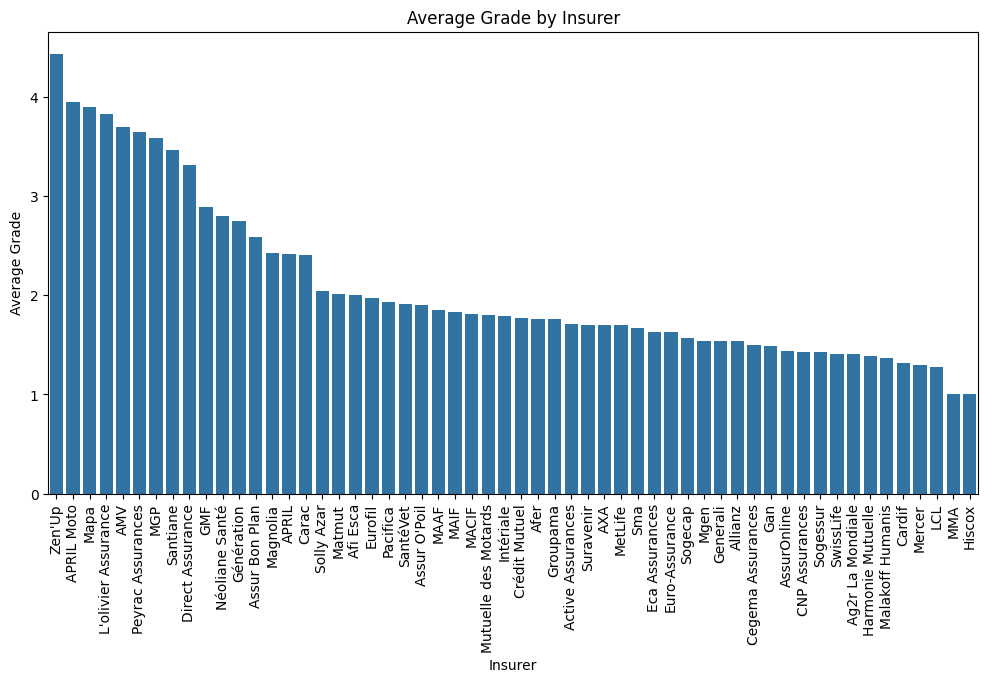

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'insurer' and calculate the mean of 'grade'
average_grade_by_insurer = df.groupby('assureur')['note'].mean().reset_index()

# Sort the data by the average grade for better visualization
average_grade_by_insurer = average_grade_by_insurer.sort_values(by='note', ascending=False)

# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='assureur', y='note', data=average_grade_by_insurer)
plt.title('Average Grade by Insurer')
plt.xlabel('Insurer')
plt.ylabel('Average Grade')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

/tmp/ipykernel_6975/3992712767.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='assureur', y='note', data=top_insurer_data, palette='muted')


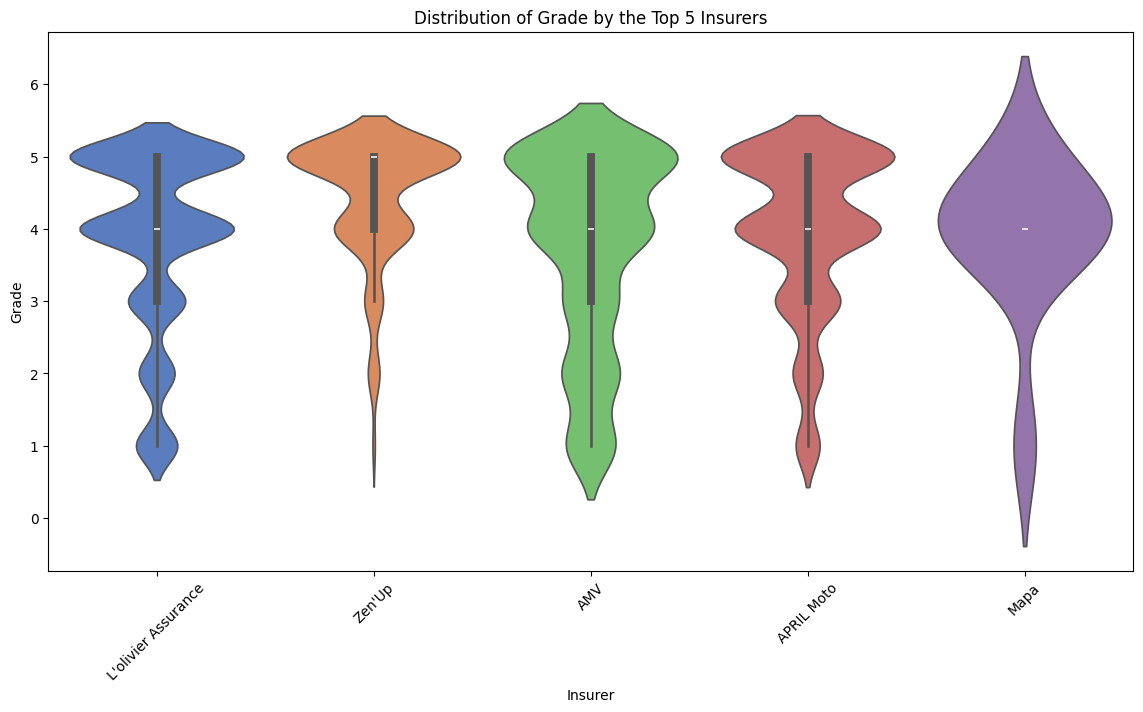

In [66]:

# Calculate the average grade for each insurer and get the top 5 insurers
top_insurers = df.groupby('assureur')['note'].mean().sort_values(ascending=False).head(5).index

# Filter the DataFrame to only include data from the top 5 insurers
top_insurer_data = df[df['assureur'].isin(top_insurers)]

# Plot the distribution of grades for the top 5 insurers
plt.figure(figsize=(14, 7))
sns.violinplot(x='assureur', y='note', data=top_insurer_data, palette='muted')
plt.title('Distribution of Grade by the Top 5 Insurers')
plt.xlabel('Insurer')
plt.ylabel('Grade')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

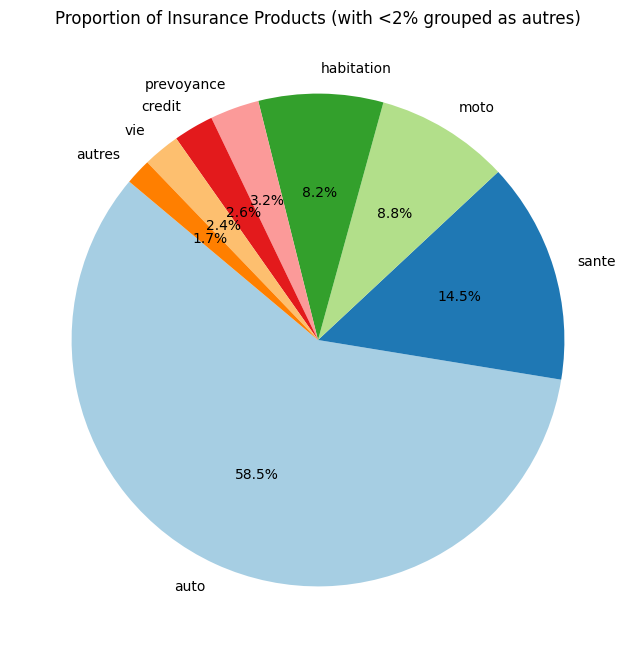

In [75]:
# Calculate the count and proportion of each product
product_counts = df['produit'].value_counts()
product_proportions = product_counts / product_counts.sum() * 100

# Categorize products with less than 2% as 'Autre'
product_proportions['autres'] = product_proportions[product_proportions < 2].sum()

# Filter out products that have less than 2% and create a new Series
filtered_product_proportions = product_proportions[product_proportions >= 2]

# Combine the 'autres' category
final_product_proportions = pd.concat([filtered_product_proportions, pd.Series({'autres': product_proportions['autres']})])

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(final_product_proportions, labels=final_product_proportions.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of Insurance Products (with <2% grouped as autres)')
plt.show()

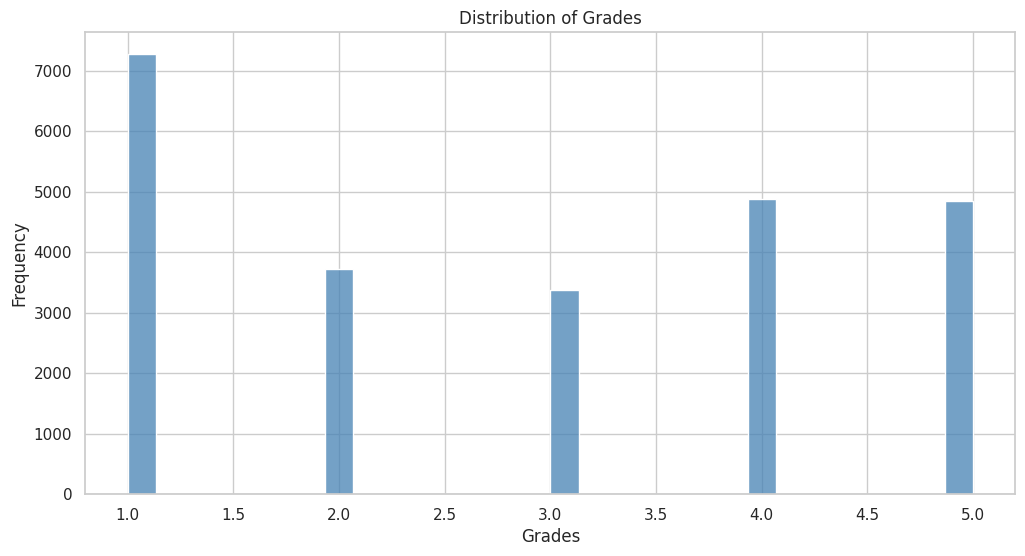

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample code to load the data
# df = pd.read_csv('path/to/your/data.csv')  # Uncomment and modify the path as needed

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a distribution plot for the 'note' column
plt.figure(figsize=(12, 6))
sns.histplot(df['note'], color='steelblue', bins=30)
plt.title('Distribution of Grades')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.show()